In [1]:
import random
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ast

In [2]:
df = pd.read_csv("file_path")

# Convert stringified lists in 'tokens' column back to real lists
df['tokens'] = df['tokens'].apply(ast.literal_eval)

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\pradh\AppData\Local\Temp\ipykernel_4036\2319990192.py:1: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv("E:\Academics\Semester-6\DS 203(Prog. for DS)\Project\Code\processed_df.csv")


In [3]:
# Settings
vector_size = 300
dm_type = 1
window_sizes = list(range(2, 101))
random.seed(42)
np.random.seed(42)
 
# Common sample & data
sample_indices = random.sample(list(df.index), 40)
tagged_data = [TaggedDocument(words=tokens, tags=[str(i)]) for i, tokens in zip(df.index, df['tokens'])]

# Store metrics
euclidean_avgs = []
cosine_avgs = []
inferred_norms = []  # Add this before the loop


In [4]:
for window in window_sizes:
    model = Doc2Vec(tagged_data, vector_size=vector_size, window=window, min_count=1,
                    workers=4, dm=dm_type, epochs=200)
    
    top5_euclidean = []
    top5_cosine = []
    norms = []

    for idx in sample_indices:
        inferred_vector = model.infer_vector(df.loc[idx, 'tokens'])
        norms.append(np.linalg.norm(inferred_vector))  # Collect norm
        distances = []

        for i in df.index:
            if i == idx:
                continue
            vec = model.dv[str(i)]
            dist = euclidean(inferred_vector, vec)
            distances.append((dist, i))

        top5 = sorted(distances)[:5]
        avg_euclid = sum([d[0] for d in top5]) / 5
        top5_euclidean.append(avg_euclid)

        cos_sims = []
        for _, i in top5:
            vec = model.dv[str(i)].reshape(1, -1)
            sim = cosine_similarity(inferred_vector.reshape(1, -1), vec)[0][0]
            cos_sims.append(sim)
        avg_cosine = sum(cos_sims) / 5
        top5_cosine.append(avg_cosine)

    euclidean_avgs.append(np.mean(top5_euclidean))
    cosine_avgs.append(np.mean(top5_cosine))
    inferred_norms.append(np.mean(norms))  # Store avg norm for this window

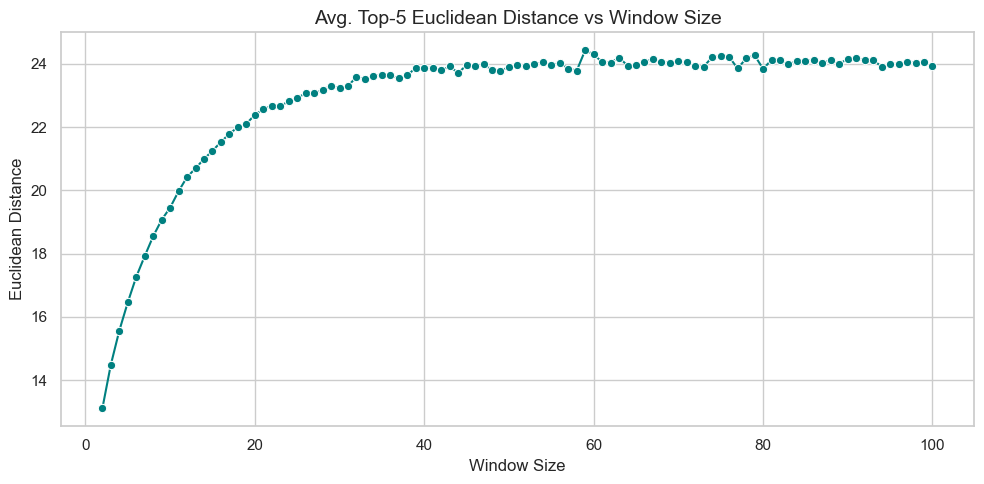

In [5]:
sns.set_theme(style="whitegrid")

# Plot 1: Euclidean Distance
plt.figure(figsize=(10, 5))
sns.lineplot(x=window_sizes, y=euclidean_avgs, marker='o', color='teal')
plt.title("Avg. Top-5 Euclidean Distance vs Window Size", fontsize=14)
plt.xlabel("Window Size", fontsize=12)
plt.ylabel("Euclidean Distance", fontsize=12)
plt.tight_layout()
plt.show()

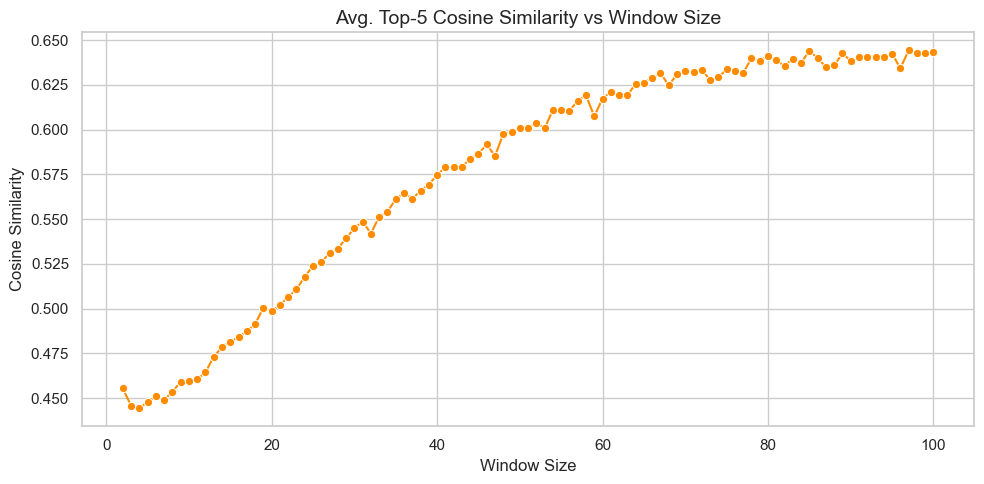

In [6]:
# Plot 2: Cosine Similarity
plt.figure(figsize=(10, 5))
sns.lineplot(x=window_sizes, y=cosine_avgs, marker='o', color='darkorange')
plt.title("Avg. Top-5 Cosine Similarity vs Window Size", fontsize=14)
plt.xlabel("Window Size", fontsize=12)
plt.ylabel("Cosine Similarity", fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\pradh\AppData\Local\Temp\ipykernel_4036\3896514485.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=window_sizes, y=inferred_norms, marker='o',palette='coolwarm')


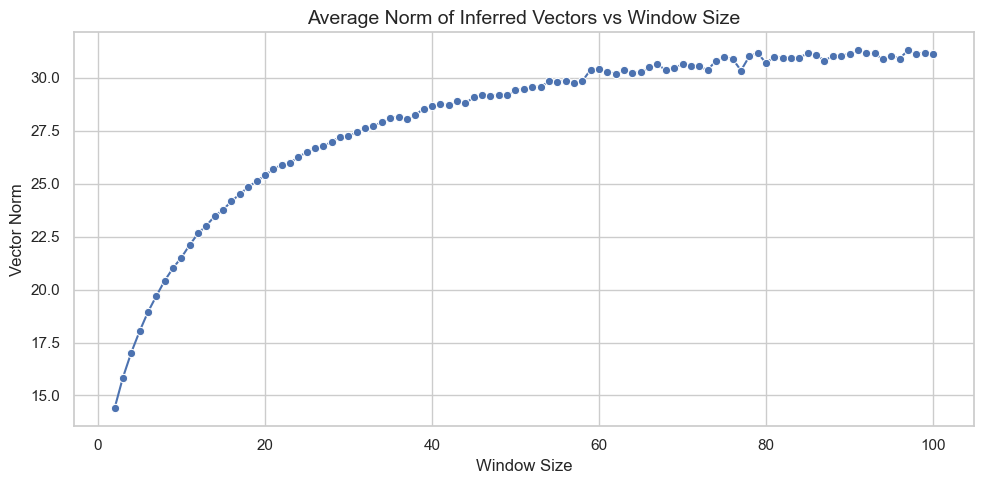

In [7]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=window_sizes, y=inferred_norms, marker='o',palette='coolwarm')
plt.title("Average Norm of Inferred Vectors vs Window Size", fontsize=14)
plt.xlabel("Window Size", fontsize=12)
plt.ylabel("Vector Norm", fontsize=12)
plt.tight_layout()
plt.show()